
# Libraries



In [2]:
import numpy as np
import random
import pandas as pd
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
import seaborn as sns
import pandas as pd
from google.colab.patches import cv2_imshow
rcParams['figure.figsize'] = 20, 10
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.datasets import make_classification
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import roc_curve,auc
from itertools import cycle
import os


In [3]:
import os


# Data Preprocess

# Extracting images from directory

In [4]:
os.listdir("./drive/MyDrive/data")


['donuts',
 'steak',
 'cheesecake',
 'waffles',
 'mussels',
 'sushi',
 'tacos',
 'pizza']

# Pick up 10 food to study


In [5]:
food_list = ['donuts',
 'steak',
 'cheesecake',
 'waffles',
 'mussels',
 'sushi',
 'tacos',
 'pizza']


In [9]:
data_path = './drive/MyDrive/data'
data_dir_list = os.listdir(data_path)

img_data_list=[]

for dataset in data_dir_list:
    if dataset not in food_list:
      continue
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Succed to Load the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(150, 150))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')

img_data = img_data/255
img_data.shape


index_to_labels = ['donuts','steak',
 'cheesecake',
 'waffles',
 'mussels',
 'sushi',
 'tacos',
 'pizza']

Succed to Load the images of dataset-donuts

Succed to Load the images of dataset-steak

Succed to Load the images of dataset-cheesecake

Succed to Load the images of dataset-waffles

Succed to Load the images of dataset-mussels

Succed to Load the images of dataset-sushi

Succed to Load the images of dataset-tacos

Succed to Load the images of dataset-pizza



## Show examples of the import picture


## Show Examples of the Picture

We want to make sure that the photos are loaded sucessfully


In [11]:
len(os.listdir(data_path+'/'+ dataset))

9

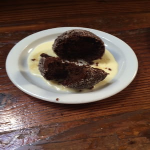

(150, 150, 3)
(150, 150, 3)


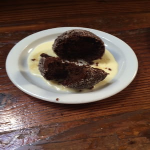

In [12]:
cv2_imshow(img_data_list[0])
print(img_data_list[0].shape)
print(img_data[0].shape)
cv2_imshow(img_data[0]*255)

# Putting label in data¶


In [13]:
num_classes = 8

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
for i in range(8):
  labels[9*i:8 + 9*i] = i


# Dataset Overview

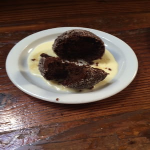

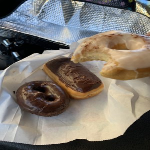

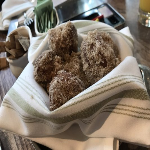

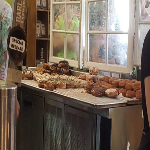

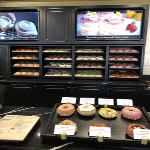

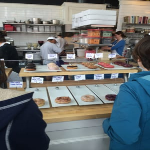

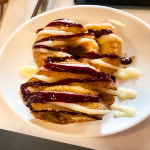

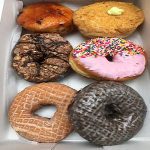

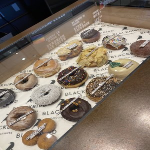

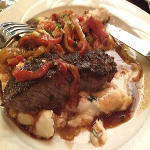

In [14]:
for i in range(10):
  cv2_imshow(img_data[i] * 255)


# Creating Model


In [23]:
def create_model(learning_rate):
    input_shape=(150, 150,3)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer= keras.optimizers.SGD(lr = learning_rate))
    
    return model


# Model Summary

In [24]:
learning_rate = 0.01

model_custom = create_model(learning_rate)
model_custom.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 6)       456       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 16)        2416      
_________________________________________________________________
activation_2 (Activation)    (None, 75, 75, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 35, 35, 64)        9280      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)       

# Model Visualization 

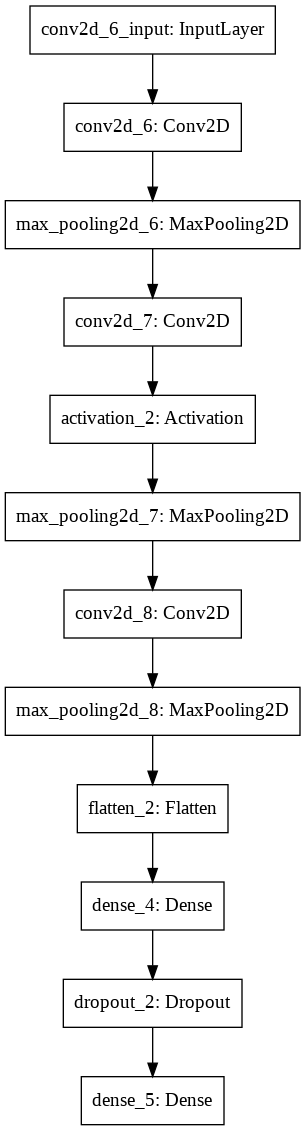

In [25]:
from keras.utils import plot_model
plot_model(model_custom, to_file='model.png')

# Training Model

In [43]:
learning_rate = 0.01
batch_size = 3
EPOCHS = 7
if not os.path.exists("model"):
  os.makedirs("model")


In [44]:
Y = np_utils.to_categorical(labels, num_classes)

x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=2)

In [45]:
file_path = "./models/trained_model.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=0, save_best_only=True, mode='min')
early = EarlyStopping(monitor="loss", mode="min", patience=8)

callbacks_list = [checkpoint, early]

model = create_model(learning_rate)
hist = model.fit(X_train, y_train, batch_size = batch_size, epochs= EPOCHS, validation_data=(X_test, y_test), verbose=1)    
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/7
15/15 [==============================] - 1s 23ms/step - loss: 2.1384 - accuracy: 0.1008 - val_loss: 2.0416 - val_accuracy: 0.3103
Epoch 2/7
15/15 [==============================] - 0s 9ms/step - loss: 2.0369 - accuracy: 0.3161 - val_loss: 2.0646 - val_accuracy: 0.1034
Epoch 3/7
15/15 [==============================] - 0s 9ms/step - loss: 2.0808 - accuracy: 0.0901 - val_loss: 2.0518 - val_accuracy: 0.2414
Epoch 4/7
15/15 [==============================] - 0s 9ms/step - loss: 2.0195 - accuracy: 0.2375 - val_loss: 2.0533 - val_accuracy: 0.1034
Epoch 5/7
15/15 [==============================] - 0s 9ms/step - loss: 2.0341 - accuracy: 0.1836 - val_loss: 2.0659 - val_accuracy: 0.1724
Epoch 6/7
15/15 [==============================] - 0s 9ms/step - loss: 2.0311 - accuracy: 0.2583 - val_loss: 2.0499 - val_accuracy: 0.2759
Epoch 7/7
15/15 [==============================] - 0s 9ms/step - loss: 2.0425 - accuracy: 0.2216 - val_loss: 2.0683 - val_accuracy: 0.2069


# Evaluating model


## Pick 10 random pictures and compare the predicted result with the expected *behavior*

Test Loss: 2.0683348178863525
Test accuracy: 0.2068965584039688


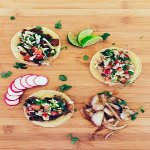

predicted_label:mussels


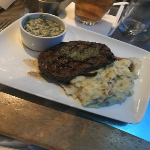

predicted_label:mussels


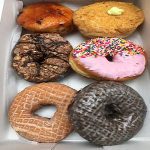

predicted_label:mussels


In [51]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])
def getLabelByIndex(i):
    return index_to_labels[i]
for i in range(3):
  index = random.randint(0, 29)
  cv2_imshow(X_test[index] * 255)
  test_image = X_test[index: index + 1]
  y_pred = model(test_image)
  print("predicted_label:"+ getLabelByIndex(np.argmax(y_pred, axis=1)[0]))

# Visualization

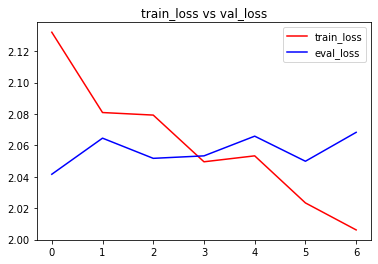

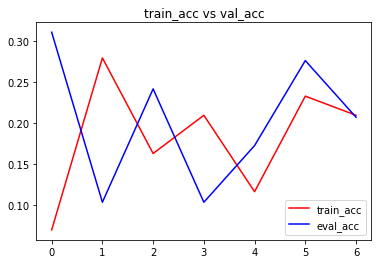

<Figure size 432x288 with 0 Axes>

In [53]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='eval_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='eval_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

#Model Save
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

# Confusion Matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


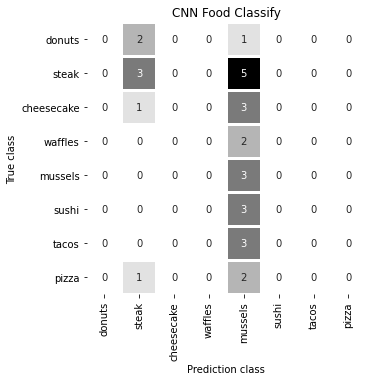

In [54]:
from sklearn.metrics import confusion_matrix
results = model.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)

label_mapdisgust = ['donuts','steak',
 'cheesecake',
 'waffles',
 'mussels',
 'sushi',
 'tacos',
 'pizza']


#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )

final_cm = cm_df

plt.figure(figsize = (5,5))
sns.heatmap(final_cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Food Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

# ROC Curve

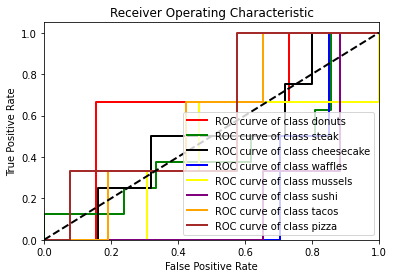

In [55]:
final_label = ['donuts','steak',
 'cheesecake',
 'waffles',
 'mussels',
 'sushi',
 'tacos',
 'pizza']
new_class = 8
y_pred = model.predict(X_test)
y_pred_ravel = y_pred.ravel()
lw = 2

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(new_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
#colors = cycle(['red', 'green','black'])
colors = cycle(['red', 'green','black','blue', 'yellow','purple','orange', 'brown', 'gold', 'lime'])
for i, color in zip(range(new_class), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0}'''.format(final_label[i]))
    

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()